In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *
import weight_sharing_AL as WSAL

%load_ext autoreload
%autoreload 2

# for plotting
import numpy as np

In [2]:
import seaborn as sns
sns.set()


> 0 if first > second else 1

## Weight Sharing and Auxilary Loss

Use simamiese newtwork and weight sharing for prediction as well as a custom loss function. The Network predicts a the value of the digit. The loss is then computed on the sum of the loss of the prediction of the first value, the second value and if the first is higher than the second value.

In [30]:
torch.manual_seed(42)
all_classified = []
misclassified = []
accuracies_train = []
accuracies_test = []
mini_batch_size = 100
losses = np.zeros((15,25))
for i in range(15):
    print("-"*50,f" \n Iteration {i} \n ")
    # Generate the pairs
    train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)
    
    # define the model
    model =  WSAL.LeNetLike() 
    
    # train model
    
    for k in range(25):
        losses[i,k] = WSAL.train(model, train_input,train_classes,train_target.float(), mini_batch_size)

    train_accuracy = WSAL.accuracy(model,train_input,train_target)
    test_accuracy = WSAL.accuracy(model,test_input,test_target)
    
    misclass = WSAL.get_mis_class(model,test_input,test_target,test_classes)
    [all_classified.append(x) for x in test_classes]
    [misclassified.append(x) for x in misclass ]
    accuracies_train.append(train_accuracy )
    accuracies_test.append(test_accuracy )
    print(f"Baseline Training accuracy is {train_accuracy} ")
    print(f"Baseline Test accuracy is {test_accuracy} ")

--------------------------------------------------  
 Iteration 0 
 
Baseline Training accuracy is 0.998 
Baseline Test accuracy is 0.963 
--------------------------------------------------  
 Iteration 1 
 
Baseline Training accuracy is 0.993 
Baseline Test accuracy is 0.955 
--------------------------------------------------  
 Iteration 2 
 
Baseline Training accuracy is 0.995 
Baseline Test accuracy is 0.951 
--------------------------------------------------  
 Iteration 3 
 
Baseline Training accuracy is 0.994 
Baseline Test accuracy is 0.964 
--------------------------------------------------  
 Iteration 4 
 
Baseline Training accuracy is 0.8 
Baseline Test accuracy is 0.803 
--------------------------------------------------  
 Iteration 5 
 
Baseline Training accuracy is 0.995 
Baseline Test accuracy is 0.957 
--------------------------------------------------  
 Iteration 6 
 
Baseline Training accuracy is 0.995 
Baseline Test accuracy is 0.934 
-----------------------------

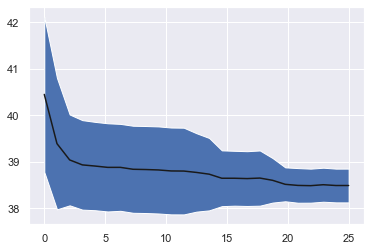

In [47]:
WSAL.plotloss(losses.T)

### Evaluation of model performance

In [34]:
accs_train = torch.Tensor(accuracies_train)
print(f"The training accuracy of the model is {accs_train.mean():.4f} ± {accs_train.var():.4f} ")

The training accuracy of the model is 0.9731 ± 0.0033 


In [35]:
accs_test = torch.Tensor(accuracies_test)
print(f"The test accuracy of the model is {accs_test.mean():.4f} ± {accs_test.var():.4f} ")

The test accuracy of the model is 0.9382 ± 0.0020 


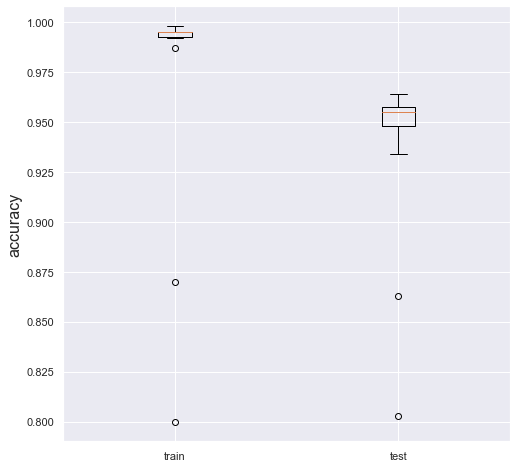

In [36]:
plot_performance(accuracies_train,accuracies_test)

In [38]:
all_classified = np.stack(all_classified)
misclassified = np.stack(misclassified)
plot_heatmap(misclassified,all_classified)

ValueError: Must pass 2-d input